<a href="https://colab.research.google.com/github/Rakshit-Khatri/WARP-26-INSPECT/blob/main/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([transforms.ToTensor()])

In [5]:
batch_size = 32

In [6]:
training_dataset = torchvision.datasets.MNIST(root = "Data", download = True, train = True, transform = transform)
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size = batch_size, shuffle = True, num_workers = 2)

100.0%
100.0%
100.0%
100.0%


In [7]:
test_dataset = torchvision.datasets.MNIST(root = "Data", download = True, train = False, transform = transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, num_workers = 2)

In [8]:
training_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: Data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [9]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: Data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [10]:
img, label = training_dataset[0]

In [11]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [12]:
img.shape

torch.Size([1, 28, 28])

In [13]:
label

5

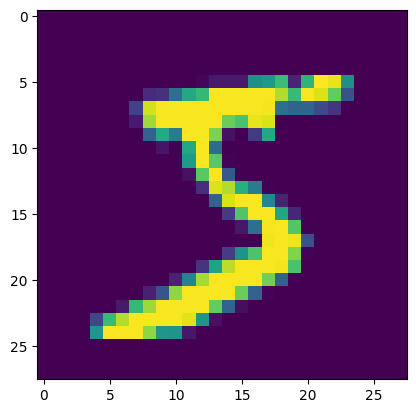

In [14]:
plt.imshow(img.reshape(28,28))

In [15]:
test_flatten = nn.Flatten()
test_flatten(img).size()

torch.Size([1, 784])

In [16]:
from torch.nn.modules.activation import ReLU
class NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.network = nn.Sequential(
        nn.Linear(in_features = 784, out_features = 128),
        nn.ReLU(),
        nn.Linear(in_features = 128, out_features = 64),
        nn.ReLU(),
        nn.Linear(in_features = 64, out_features = 10)
    )
  def forward(self, x):
    x = self.flatten(x)
    logint = self.network(x)
    return logint

In [34]:
device = "cpu"
device

'cpu'

In [18]:
model = NN().to(device = device)

In [19]:
for parms in model.parameters():
  print(parms.numel())

100352
128
8192
64
640
10


In [20]:
for name, parms in model.named_parameters():
  print(name)

network.0.weight
network.0.bias
network.2.weight
network.2.bias
network.4.weight
network.4.bias


In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [22]:
EPOCH = 4
best_vloss = 1_00_000.
epoch_number = 0

In [23]:
for epoch in range(EPOCH):
  running_loss = 0
  loss_per_batch = 0

  model.train(True)

  for i, data in enumerate(training_loader):
    inputs, labels = data
    optimizer.zero_grad()
    output = model(inputs.to(device = device))

    loss = loss_fn(output, labels.to(device = device))
    loss.backward()

    optimizer.step()

    running_loss += loss.item()

    if i % 999:
      loss_per_batch = running_loss / 1000
      print(f"batch: {i} loss: {loss_per_batch}")

  running_vloss = 0.0
  model.eval()

  with torch.no_grad():
    for i, vdata in enumerate(test_loader):
      vinputs, vlabels = vdata
      voutputs = model(vinputs.to(device))
      vloss = loss_fn(voutputs, vlabels.to(device))
      running_loss += vloss

  avg_vloss = running_loss / (i + 1)

  if avg_vloss < best_vloss :
    best_vloss = avg_vloss
    model_path = f"model_{epoch}"
    torch.save(model.state_dict(), model_path)

  epoch_number += 1

print("Training is completed.")

batch: 1 loss: 0.004628114700317383
batch: 2 loss: 0.006905637741088867
batch: 3 loss: 0.009169244766235351
batch: 4 loss: 0.011426057577133178
batch: 5 loss: 0.013668979406356812
batch: 6 loss: 0.01589193844795227
batch: 7 loss: 0.018079373598098754
batch: 8 loss: 0.020280476093292237
batch: 9 loss: 0.022400877952575685
batch: 10 loss: 0.024524452686309813
batch: 11 loss: 0.026572381496429442
batch: 12 loss: 0.028656482458114623
batch: 13 loss: 0.03074187636375427
batch: 14 loss: 0.03280144476890564
batch: 15 loss: 0.034851676464080814
batch: 16 loss: 0.03683547830581665
batch: 17 loss: 0.03877061939239502
batch: 18 loss: 0.04071057724952698
batch: 19 loss: 0.04253822016716004
batch: 20 loss: 0.04438752007484436
batch: 21 loss: 0.046151841878890994
batch: 22 loss: 0.04786119318008423
batch: 23 loss: 0.04957275247573852
batch: 24 loss: 0.0513325343132019
batch: 25 loss: 0.053075470685958866
batch: 26 loss: 0.054689034938812255
batch: 27 loss: 0.05627324438095093
batch: 28 loss: 0.05780

In [24]:
model_loaded = NN()
model_loaded.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [25]:
img = test_dataset[27][0]
img.shape

torch.Size([1, 28, 28])

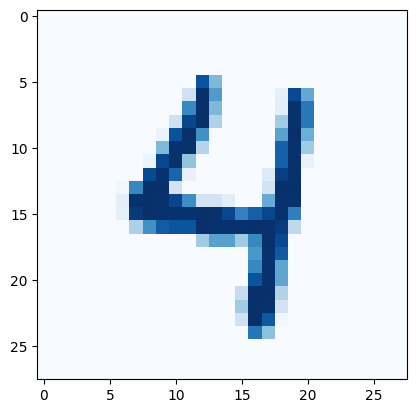

In [26]:
plt.imshow(img.reshape(28,28), cmap="Blues")

In [27]:
outputs = model_loaded(img)
outputs

tensor([[-11.5730,  -8.8167,  -6.3451,  -8.0897,  13.2075,  -7.3282, -12.5549,
          -2.6806,  -7.6420,   1.6140]], grad_fn=<AddmmBackward0>)

In [28]:
predict = torch.max(outputs, 1)

In [29]:
predict

torch.return_types.max(
values=tensor([13.2075], grad_fn=<MaxBackward0>),
indices=tensor([4]))

In [35]:
model_loaded.eval()

total = 0
correct = 0

with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    inputs, labels = inputs.to(device = device), labels.to(device = device)

    outputs = model_loaded(inputs)
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f"Accuracy of the model is {accuracy:.2f}")

Accuracy of the model is 97.61
